In [81]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
# Load the dataset
file_path = "data1.xlsx"
df = pd.read_excel(file_path)

In [83]:
# Inspect the dataset
print(df.head())

   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2016  17023       17     Clark County         1    16089     15862   
1  2016  17025       17      Clay County         2    13466     13284   
2  2016  17027       17   Clinton County         3    37858     36704   
3  2016  17029       17     Coles County         4    52802     51578   
4  2016  17033       17  Crawford County         5    19441     19026   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  TOT_CVAP  BPV_CVAP  APV_CVAP  \
0      227    155574        68  ...     12330      2543      9787   
1      182     12991        84  ...     10370      1710      8660   
2     1154     34692      1271  ...     29535      3003     26532   
3     1224     48195      1928  ...     42505      9342     33163   
4      415     17714       814  ...     15455      2163     13392   

   TOT_VOT_REG  CREP_TOT_VOTE  CDEM_TOT_VOTE   CWINNER  PDEM_TOT_VOT  \
0         7928           1291           4914  Republic          1877   
1 

In [84]:
df.describe()

,Year,GEOID,STATEID,COUNTYID,TOT_POP,NHSP_POP,HSP_POP,WHT_NHSP,BLK_NHSP,AIA_NHSP,...,MALE_POP,FEMALE_POP,TOT_CVAP,BPV_CVAP,APV_CVAP,TOT_VOT_REG,CREP_TOT_VOTE,CDEM_TOT_VOTE,PDEM_TOT_VOT,PREP_TOT_VOT
count,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2019.333333,17105.000000,17.0,15.500000,29695.350000,28683.277778,1012.072222,24792.305556,3606.905556,158.850000,...,14522.661111,12668.144444,18881.711111,2975.238889,15907.027778,12229.488889,3065.522222,2994.927778,2386.111111,4422.894444
std,1.977527,58.563817,0.0,8.679585,45904.754952,43812.977911,2180.716012,30329.919903,13739.090271,352.832489,...,21211.794867,22178.753986,29987.120292,3378.441655,27580.339017,25199.687374,4769.906661,4452.074393,8410.169976,8294.217451
min,2016.000000,17023.000000,17.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1811.000000,180.000000,1633.000000,339.000000,-4497.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,17049.000000,17.0,8.000000,10508.500000,10377.750000,162.500000,10107.000000,74.000000,18.000000,...,5441.250000,2765.750000,5281.500000,1060.500000,3949.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.500000,17094.000000,17.0,15.500000,16153.000000,15754.500000,441.000000,15369.500000,281.500000,62.000000,...,8124.000000,7079.500000,10781.000000,1870.500000,9100.500000,6091.500000,1018.500000,1340.000000,0.000000,0.000000
75%,2021.000000,17157.000000,17.0,23.000000,34684.000000,33817.500000,966.000000,32798.750000,1656.750000,160.000000,...,17401.250000,15182.250000,20860.500000,3186.250000,15413.500000,13591.000000,4379.000000,4060.750000,1588.000000,5790.250000
max,2022.000000,17199.000000,17.0,30.000000,265569.000000,255561.000000,17392.000000,165693.000000,79868.000000,2325.000000,...,127237.000000,136226.000000,198690.000000,22215.000000,192333.000000,197310.000000,29091.000000,25600.000000,68325.000000,57150.000000


In [85]:
# Checking for the for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Year             0
GEOID            0
STATEID          0
COUNTY           0
COUNTYID         0
TOT_POP          0
NHSP_POP         0
HSP_POP          0
WHT_NHSP         0
BLK_NHSP         0
AIA_NHSP         0
ASN_NHSP         0
MEDN_INC         0
MALE_POP         0
FEMALE_POP       0
TOT_CVAP         0
BPV_CVAP         0
APV_CVAP         0
TOT_VOT_REG      0
CREP_TOT_VOTE    0
CDEM_TOT_VOTE    0
CWINNER          0
PDEM_TOT_VOT     0
PREP_TOT_VOT     0
PWINNER          0
dtype: int64


# EDA

In [86]:
# Summary of Race Statistics
race_col = ['NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP', 'AIA_NHSP', 'ASN_NHSP']
df_subset = df[race_col]
summary = df_subset.describe()


#Summary
for column in race_col:
    print(f"Summary for {column}:")
    print(f"  Mean: {df[column].mean()}")
    print(f"  Median: {df[column].median()}")
    print(f"  Mode: {df[column].mode()[0]}")
    print(f"  Standard Deviation: {df[column].std()}")
    print(f"  Min: {df[column].min()}")
    print(f"  Max: {df[column].max()}")
    print(f"  Skewness: {df[column].skew()}")
    print(f"  Kurtosis: {df[column].kurtosis()}")
    print()


Summary for NHSP_POP:
  Mean: 28683.277777777777
  Median: 15754.5
  Mode: 13827
  Standard Deviation: 43812.97791113909
  Min: 0
  Max: 255561
  Skewness: 4.284244920890431
  Kurtosis: 19.147662679872138

Summary for HSP_POP:
  Mean: 1012.0722222222222
  Median: 441.0
  Mode: 24
  Standard Deviation: 2180.7160118556817
  Min: 0
  Max: 17392
  Skewness: 4.978404678161186
  Kurtosis: 27.35071473565905

Summary for WHT_NHSP:
  Mean: 24792.305555555555
  Median: 15369.5
  Mode: 3872
  Standard Deviation: 30329.91990313681
  Min: 0
  Max: 165693
  Skewness: 3.3921978729826345
  Kurtosis: 12.503989776661811

Summary for BLK_NHSP:
  Mean: 3606.9055555555556
  Median: 281.5
  Mode: 12
  Standard Deviation: 13739.0902708832
  Min: 0
  Max: 79868
  Skewness: 5.142507343666226
  Kurtosis: 25.133757908818236

Summary for AIA_NHSP:
  Mean: 158.85
  Median: 62.0
  Mode: 0
  Standard Deviation: 352.83248870221547
  Min: 0
  Max: 2325
  Skewness: 5.125826307731624
  Kurtosis: 28.437150525542837

Summ

<ipython-input-87-f6cce5820412>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population_Category'] = pd.cut(df[race], bins=[0, low_threshold, high_threshold, df[race].max()],
<ipython-input-87-f6cce5820412>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-87-f6cce5820412>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population

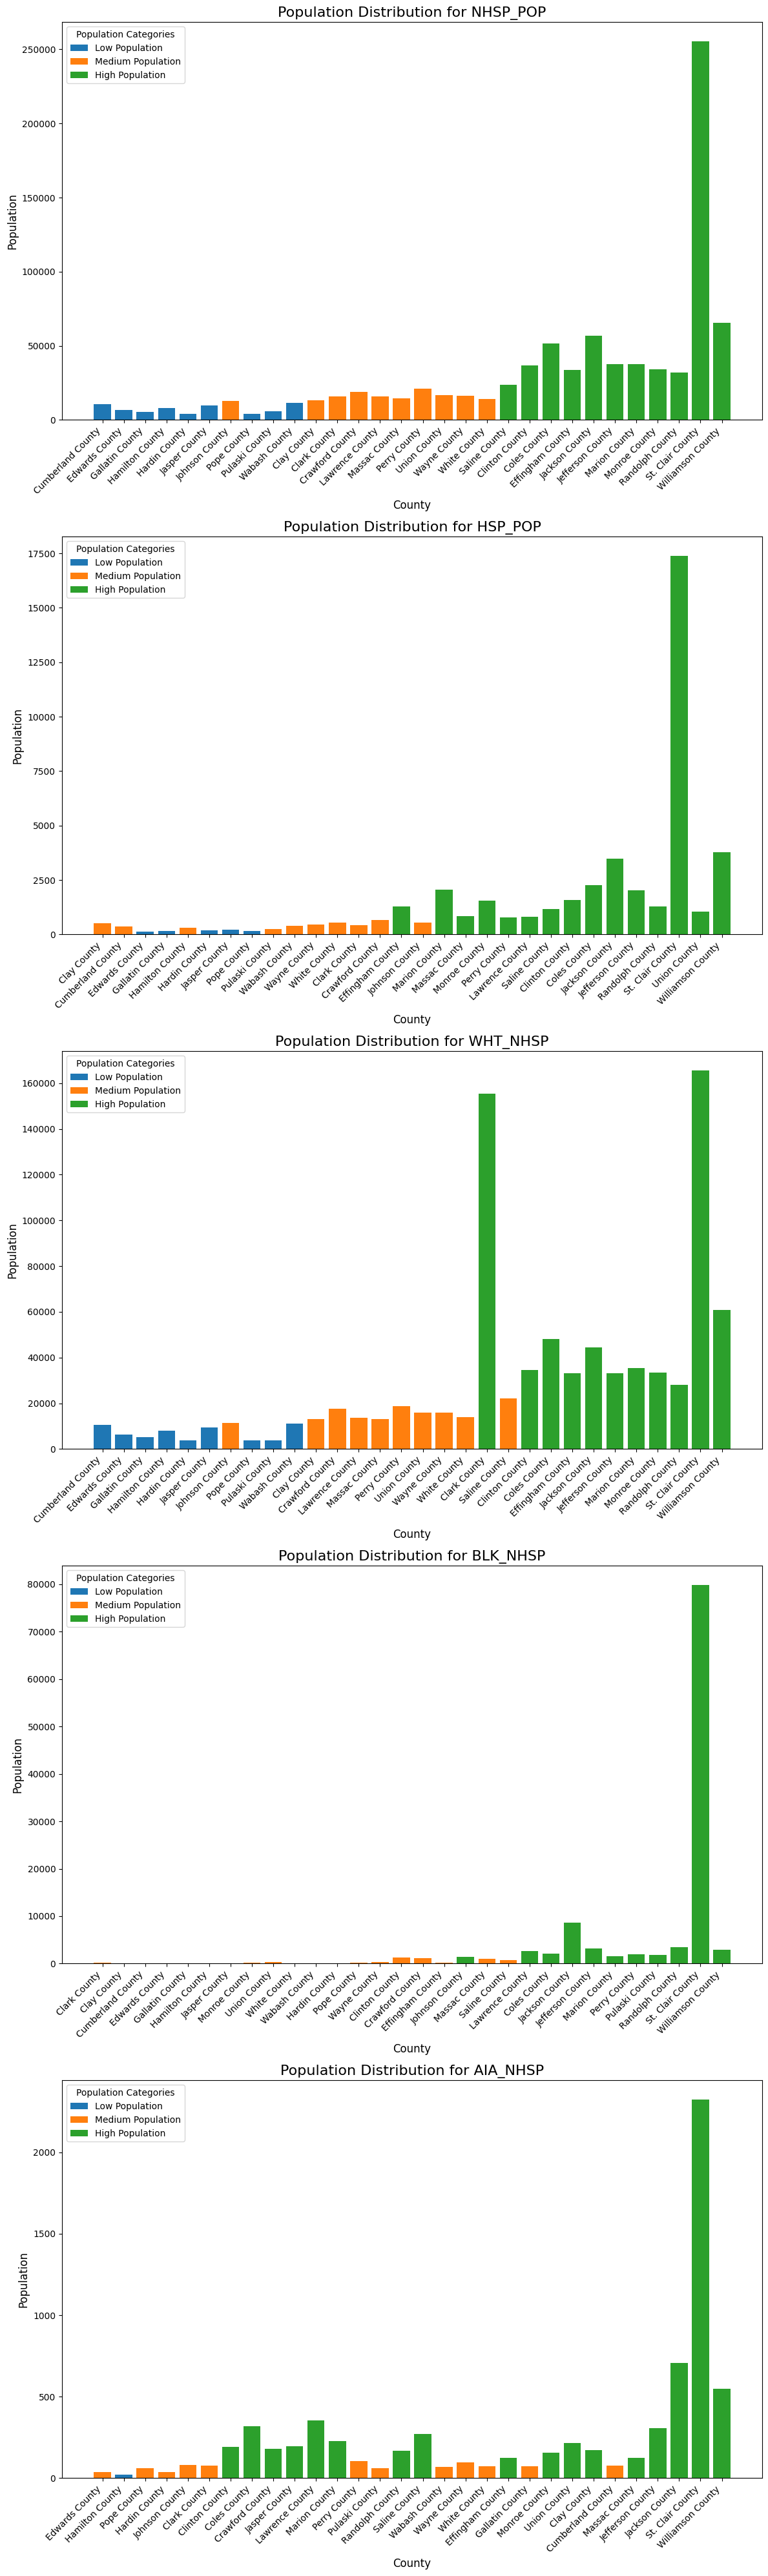

In [87]:
#Separate columns for different race categories
df_subset = df[['COUNTY','NHSP_POP','HSP_POP','WHT_NHSP','BLK_NHSP','AIA_NHSP']]
race_columns = df_subset.columns[1:]

# Categorize population ranges
def categorize_population(df, race):
    # population thresholds for categories
    low_threshold = df[race].quantile(0.33)
    high_threshold = df[race].quantile(0.66)

    # Categorize population as 'Low', 'Medium', 'High' based on thresholds
    df['Population_Category'] = pd.cut(df[race], bins=[0, low_threshold, high_threshold, df[race].max()],
                                       labels=['Low', 'Medium', 'High'])
    return df

# Set up subplots: One plot per race category
n_races = len(race_columns)
fig, axes = plt.subplots(n_races, 1, figsize=(12, 8 * n_races))  # Adjust figsize based on number of races

if n_races == 1:
    axes = [axes]

# Iterate through each race category and plot the bar chart
for i, race in enumerate(race_columns):
    ax = axes[i]
    # Categorize counties based on population for the current race category
    df_race = categorize_population(df_subset, race)

    # Plot each category of population in a separate bar plot
    for category in ['Low', 'Medium', 'High']:
        df_category = df_race[df_race['Population_Category'] == category]
        ax.bar(df_category['COUNTY'], df_category[race], label=f'{category} Population', width=0.8)

    # Add labels and title
    ax.set_title(f'Population Distribution for {race}', fontsize=16)
    ax.set_xlabel('County', fontsize=12)
    ax.set_ylabel('Population', fontsize=12)

    # Rotate x-axis labels and adjust layout
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Population Categories', loc='upper left')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()



# Model preparation

Feature Importance Ranking for CWINNER:
            Feature  Importance
8       TOT_VOT_REG    0.640592
12       FEMALE_POP    0.043007
9          AIA_NHSP    0.037700
2           HSP_POP    0.034821
10         MEDN_INC    0.030406
4          BLK_NHSP    0.027786
7          APV_CVAP    0.026613
6          BPV_CVAP    0.022865
1          NHSP_POP    0.020318
5          TOT_CVAP    0.019458
3          WHT_NHSP    0.019436
0           TOT_POP    0.018707
11         MALE_POP    0.017502
19        age_55_64    0.005109
15        age_25_29    0.004801
18        age_45_54    0.004580
14        age_20_24    0.004038
24  voters_gender_f    0.003780
20        age_65_74    0.003493
23  voters_gender_m    0.003064
16        age_30_34    0.002839
13        age_18_19    0.002496
17        age_35_44    0.002371
22       age_85over    0.002165
21        age_75_84    0.002052

Feature Importance Ranking for PWINNER:
            Feature  Importance
8       TOT_VOT_REG    0.287886
12       FEMALE_POP    

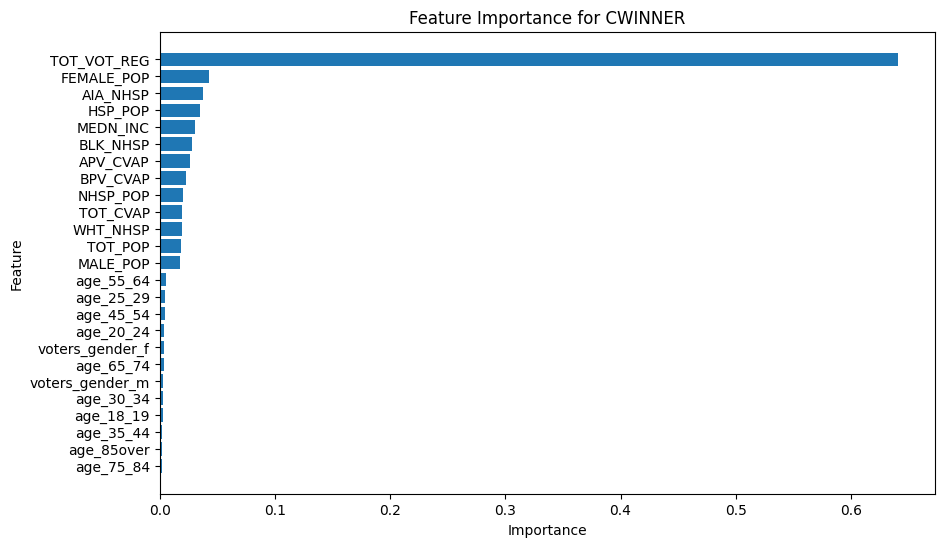

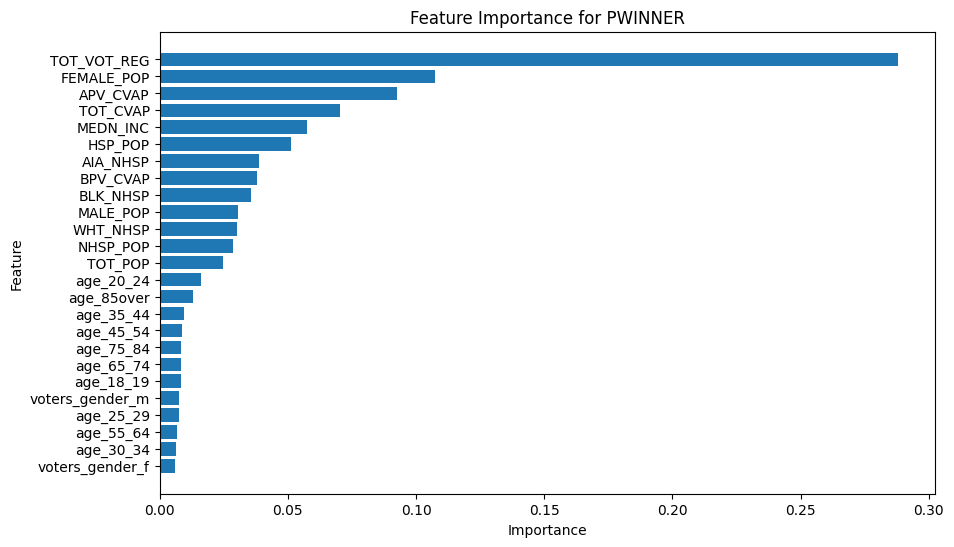

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path1 = "data1.xlsx"  # Replace with your dataset path
df1 = pd.read_excel(file_path1)

# Load the second dataset
file_path2 = "demograpgh_data.xlsx"  # Replace with your dataset path
df2 = pd.read_excel(file_path2)

# Merge the datasets based on different column names
df3 = pd.merge(df1, df2, left_on='GEOID', right_on='countyfips', how='inner')

# Define features (X) and target (y) variables
features = ['TOT_POP', 'NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP', 'TOT_CVAP', 'BPV_CVAP', 'APV_CVAP',
            'TOT_VOT_REG','AIA_NHSP','MEDN_INC','MALE_POP','FEMALE_POP',
            'age_18_19', 'age_20_24', 'age_25_29', 'age_30_34', 'age_35_44', 'age_45_54', 'age_55_64', 'age_65_74', 'age_75_84', 'age_85over', 'voters_gender_m', 'voters_gender_f']

# Target variables
target_cwinner = 'CWINNER'
target_pwinner = 'PWINNER'

# Prepare X and y for CWINNER
X_cwinner = df3[features]
y_cwinner = df3[target_cwinner]

# Prepare X and y for PWINNER
X_pwinner = df3[features]
y_pwinner = df3[target_pwinner]

# Train Random Forest classifier for CWINNER
rf_cwinner = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cwinner.fit(X_cwinner, y_cwinner)

# Train Random Forest classifier for PWINNER
rf_pwinner = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pwinner.fit(X_pwinner, y_pwinner)

# Extract feature importances
importance_cwinner = rf_cwinner.feature_importances_
importance_pwinner = rf_pwinner.feature_importances_

# Create DataFrames to display importance
importance_df_cwinner = pd.DataFrame({'Feature': features, 'Importance': importance_cwinner})
importance_df_pwinner = pd.DataFrame({'Feature': features, 'Importance': importance_pwinner})

# Sort features by importance
importance_df_cwinner = importance_df_cwinner.sort_values(by='Importance', ascending=False)
importance_df_pwinner = importance_df_pwinner.sort_values(by='Importance', ascending=False)

# Print feature importance ranking for CWINNER
print("Feature Importance Ranking for CWINNER:")
print(importance_df_cwinner)

# Print feature importance ranking for PWINNER
print("\nFeature Importance Ranking for PWINNER:")
print(importance_df_pwinner)

# Plot feature importance for CWINNER
plt.figure(figsize=(10, 6))
plt.barh(importance_df_cwinner['Feature'], importance_df_cwinner['Importance'])
plt.title("Feature Importance for CWINNER")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

# Plot feature importance for PWINNER
plt.figure(figsize=(10, 6))
plt.barh(importance_df_pwinner['Feature'], importance_df_pwinner['Importance'])
plt.title("Feature Importance for PWINNER")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


In [89]:
# Drop the specified columns from the DataFrame for presidential election prediction
df_PWINNER = df.drop(columns=['CREP_TOT_VOTE', 'CDEM_TOT_VOTE', 'CWINNER'])

# Drop rows where the year is 2019 or 2021
df_PWINNER = df_PWINNER[~df_PWINNER['Year'].isin([2018,2019,2021])]

# Display the new DataFrame
print(df_PWINNER.head())  # Show first few rows to verify



   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2016  17023       17     Clark County         1    16089     15862   
1  2016  17025       17      Clay County         2    13466     13284   
2  2016  17027       17   Clinton County         3    37858     36704   
3  2016  17029       17     Coles County         4    52802     51578   
4  2016  17033       17  Crawford County         5    19441     19026   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  MEDN_INC  MALE_POP  FEMALE_POP  TOT_CVAP  \
0      227    155574        68  ...     48693      7670         886     12330   
1      182     12991        84  ...     45984      6492         704     10370   
2     1154     34692      1271  ...     63929     17982        2040     29535   
3     1224     48195      1928  ...     38800     23782        2530     42505   
4      415     17714       814  ...     47364      9053        1007     15455   

   BPV_CVAP  APV_CVAP  TOT_VOT_REG  PDEM_TOT_VOT  PREP_TOT_VOT   PWINNER  

In [90]:
# Create the new columns for PWINNER where 'Republican' = 1 and 'Democrat' = 0
df_PWINNER['PWINNER_Republican'] = df_PWINNER['PWINNER'].apply(lambda x: 1 if x == 'Republic' else 0)

In [91]:
print(df_PWINNER.head())

   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2016  17023       17     Clark County         1    16089     15862   
1  2016  17025       17      Clay County         2    13466     13284   
2  2016  17027       17   Clinton County         3    37858     36704   
3  2016  17029       17     Coles County         4    52802     51578   
4  2016  17033       17  Crawford County         5    19441     19026   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  MALE_POP  FEMALE_POP  TOT_CVAP  BPV_CVAP  \
0      227    155574        68  ...      7670         886     12330      2543   
1      182     12991        84  ...      6492         704     10370      1710   
2     1154     34692      1271  ...     17982        2040     29535      3003   
3     1224     48195      1928  ...     23782        2530     42505      9342   
4      415     17714       814  ...      9053        1007     15455      2163   

   APV_CVAP  TOT_VOT_REG  PDEM_TOT_VOT  PREP_TOT_VOT   PWINNER  \
0      9

In [92]:
# Drop the original PWINNER CoUNTY COUNTYID columns after adding the binary columns
df_PWINNER = df_PWINNER.drop(columns=['PWINNER', 'COUNTY', 'COUNTYID'])


In [93]:
# Inspect the columns in dataset
df_PWINNER.describe().columns

Index(['Year', 'GEOID', 'STATEID', 'TOT_POP', 'NHSP_POP', 'HSP_POP',
       'WHT_NHSP', 'BLK_NHSP', 'AIA_NHSP', 'ASN_NHSP', 'MEDN_INC', 'MALE_POP',
       'FEMALE_POP', 'TOT_CVAP', 'BPV_CVAP', 'APV_CVAP', 'TOT_VOT_REG',
       'PDEM_TOT_VOT', 'PREP_TOT_VOT', 'PWINNER_Republican'],
      dtype='object')

In [94]:
# Splitting into train and test datasets based on the 'year' column
train_data = df_PWINNER[df_PWINNER['Year'] != 2022]
test_data = df_PWINNER[df_PWINNER['Year'] == 2022]

In [95]:
print(train_data['Year'].unique())

[2016 2020]


In [96]:
print(test_data['Year'].unique())

[2022]


In [97]:
# Select features
X_train = train_data.drop(columns=['Year'])
X_test = test_data.drop(columns=['Year'])


In [98]:
# ---------------------------------
# MODELING FOR Presidential Election
# ---------------------------------
#Set target column
y_train_pwinner = train_data['PWINNER_Republican']
y_test_pwinner = test_data['PWINNER_Republican']


# Logistic Regression

In [99]:
# Logistic Regression
log_reg_pwinner = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_pwinner.fit(X_train, y_train_pwinner)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [100]:
# Initialize StratifiedKFold for cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5)

# Lists to store precision, recall, F1-score, and accuracy for each fold
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train_pwinner), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_pwinner.iloc[train_idx], y_train_pwinner.iloc[val_idx]

    # Fit the model on the training data
    log_reg_pwinner.fit(X_train_cv, y_train_cv)

    # Predict on the validation data
    y_pred_cv = log_reg_pwinner.predict(X_val_cv)

    # Calculate precision, recall, and F1-score for this fold
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_cv, y_pred_cv, average='binary')

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val_cv, y_pred_cv)

    # Append to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Compute average precision, recall, F1-score, and accuracy across all folds
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)
average_accuracy = np.mean(accuracies)

# Print overall summary
print("Overall Performance (Average Across All Folds):")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1_score:.4f}")
print(f"Average Accuracy: {average_accuracy:.4f}")


Overall Performance (Average Across All Folds):
Average Precision: 0.9500
Average Recall: 1.0000
Average F1-Score: 0.9739
Average Accuracy: 0.9500


In [101]:
#Prediction
y_pred_test = log_reg_pwinner.predict(X_test)

# Evaluate the model on the test data
print("Classification Report on Test Data:")
print(classification_report(y_test_pwinner, y_pred_test))

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test_pwinner, y_pred_test)
print("Confusion Matrix on Test Data:")
print(cm_test)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test_pwinner, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.4f}")

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      0.96      0.95        28

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

Confusion Matrix on Test Data:
[[ 0  2]
 [ 1 27]]
Test Accuracy: 0.9000


In [102]:
# Calculate the number of Democrat and Republican wins for the test set
democrat_wins = np.sum(y_pred_test == 0)  # Assuming 0 is Democrat
republican_wins = np.sum(y_pred_test == 1)  # Assuming 1 is Republican

# Calculate the total number of predictions (total instances in test set)
total_test_predictions = len(y_pred_test)

# Calculate the percentage of Democrat and Republican wins in the test set
democrat_percentage_test = (democrat_wins / total_test_predictions) * 100
republican_percentage_test = (republican_wins / total_test_predictions) * 100

# Print the results
print(f"Percentage of Democrat wins in test set (Predicted): {democrat_percentage_test:.2f}%")
print(f"Percentage of Republican wins in test set (Predicted): {republican_percentage_test:.2f}%")

Percentage of Democrat wins in test set (Predicted): 3.33%
Percentage of Republican wins in test set (Predicted): 96.67%


# Random Forest

In [103]:
# Cross validation and K fold with Random forest
# Initialize StratifiedKFold for cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5)

# Lists to store precision, recall, F1-score, and accuracy for each fold
precisions_rf = []
recalls_rf = []
f1_scores_rf = []
accuracies_rf = []

# Initialize Random Forest Classifier with additional hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,      # Increase the number of estimators
    max_depth=20,          # Set maximum depth to prevent overfitting
    min_samples_split=20,  # Set minimum samples per split for more stable splits
    class_weight='balanced',
    random_state=60
)

# Initialize StandardScaler for feature scaling
scaler = StandardScaler()

# Loop through the folds for cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train_pwinner), 1):
    # Split the data for training and validation based on the indices from StratifiedKFold
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_pwinner.iloc[train_idx], y_train_pwinner.iloc[val_idx]

    # Scale the data using StandardScaler
    X_train_scaled_cv = scaler.fit_transform(X_train_cv)  # Fit and transform the training data
    X_val_scaled_cv = scaler.transform(X_val_cv)          # Only transform the validation data

    # Fit the Random Forest model on the scaled training data
    rf_classifier.fit(X_train_scaled_cv, y_train_cv)

    # Predict on the scaled validation data
    y_pred_cv_rf = rf_classifier.predict(X_val_scaled_cv)

    # Calculate precision, recall, and F1-score for this fold
    precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_val_cv, y_pred_cv_rf, average='binary')

    # Calculate accuracy for this fold
    accuracy_rf = accuracy_score(y_val_cv, y_pred_cv_rf)

    # Append to the lists
    precisions_rf.append(precision_rf)
    recalls_rf.append(recall_rf)
    f1_scores_rf.append(f1_rf)
    accuracies_rf.append(accuracy_rf)

# Compute average precision, recall, F1-score, and accuracy across all folds for Random Forest
average_precision_rf = np.mean(precisions_rf)
average_recall_rf = np.mean(recalls_rf)
average_f1_score_rf = np.mean(f1_scores_rf)
average_accuracy_rf = np.mean(accuracies_rf)

# Print overall summary for Random Forest
print("Overall Performance (Average Across All Folds) - Random Forest:")
print(f"Average Precision: {average_precision_rf:.4f}")
print(f"Average Recall: {average_recall_rf:.4f}")
print(f"Average F1-Score: {average_f1_score_rf:.4f}")
print(f"Average Accuracy: {average_accuracy_rf:.4f}")


Overall Performance (Average Across All Folds) - Random Forest:
Average Precision: 0.9633
Average Recall: 0.9800
Average F1-Score: 0.9713
Average Accuracy: 0.9500


Test Set Performance (Random Forest):
Test Precision: 0.9643
Test Recall: 0.9643
Test F1-Score: 0.9643
Test Accuracy: 0.9333
Confusion Matrix for Test Set (Random Forest):
[[ 1  1]
 [ 1 27]]
Classification Report for Test Set (Random Forest):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.96      0.96      0.96        28

    accuracy                           0.93        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.93      0.93      0.93        30



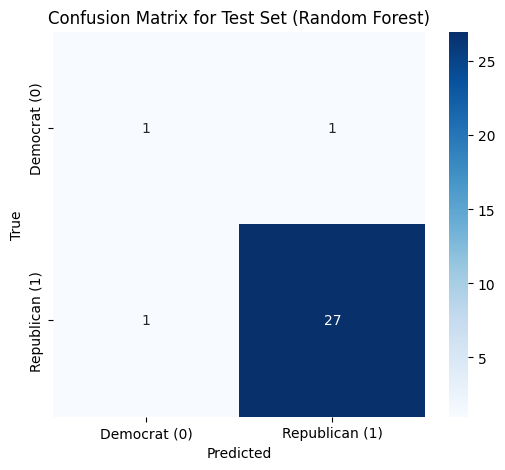

Percentage of Democrat wins (Predicted): 6.67%
Percentage of Republican wins (Predicted): 93.33%


In [104]:
# predictions on the test set using the trained model
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
y_pred_test_rf = rf_classifier.predict(X_test_scaled)  # Predict on the scaled test set

# Calculate precision, recall, F1-score, and accuracy for the test set
precision_test_rf, recall_test_rf, f1_test_rf, _ = precision_recall_fscore_support(y_test_pwinner, y_pred_test_rf, average='binary')
accuracy_test_rf = accuracy_score(y_test_pwinner, y_pred_test_rf)

# Print test set performance
print("Test Set Performance (Random Forest):")
print(f"Test Precision: {precision_test_rf:.4f}")
print(f"Test Recall: {recall_test_rf:.4f}")
print(f"Test F1-Score: {f1_test_rf:.4f}")
print(f"Test Accuracy: {accuracy_test_rf:.4f}")

# Confusion Matrix for Test Set
cm_test_rf = confusion_matrix(y_test_pwinner, y_pred_test_rf)
print("Confusion Matrix for Test Set (Random Forest):")
print(cm_test_rf)

# Classification Report for Test Set
print("Classification Report for Test Set (Random Forest):")
print(classification_report(y_test_pwinner, y_pred_test_rf))

# Plot the confusion matrix as a heatmap for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat (0)', 'Republican (1)'], yticklabels=['Democrat (0)', 'Republican (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set (Random Forest)')
plt.show()

# Calculate the percentage of predicted Democrat and Republican wins in the test set
democrat_wins_rf = np.sum(y_pred_test_rf == 0)
republican_wins_rf = np.sum(y_pred_test_rf == 1)

# Calculate percentage of wins
democrat_percentage_rf = (democrat_wins_rf / len(y_pred_test_rf)) * 100
republican_percentage_rf = (republican_wins_rf / len(y_pred_test_rf)) * 100

# Print percentages for Democrat and Republican wins in the test set
print(f"Percentage of Democrat wins (Predicted): {democrat_percentage_rf:.2f}%")
print(f"Percentage of Republican wins (Predicted): {republican_percentage_rf:.2f}%")


# KNN

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model (you can adjust n_neighbors and other parameters)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train_pwinner)

# Make predictions on the test set
y_pred_pwinner = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_pwinner, y_pred_pwinner)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test_pwinner, y_pred_pwinner))
print('Confusion Matrix:')
print(confusion_matrix(y_test_pwinner, y_pred_pwinner))

Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      0.96      0.95        28

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

Confusion Matrix:
[[ 0  2]
 [ 1 27]]


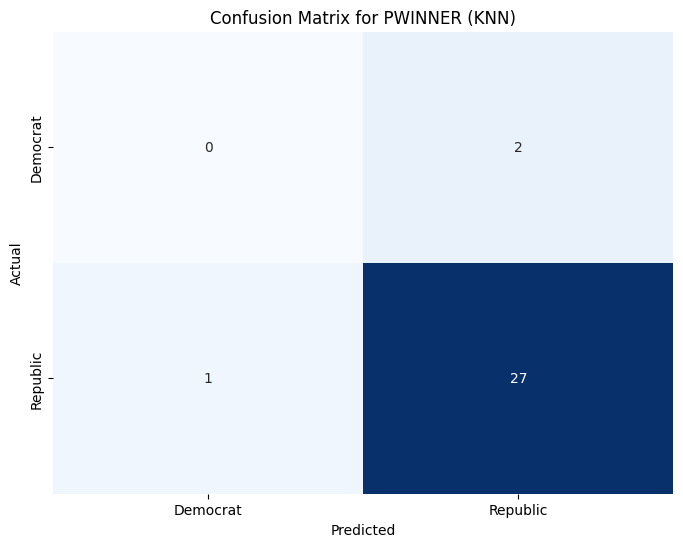

In [106]:
# Confusion matrix for PWINNER
cm_pwinner = confusion_matrix(y_test_pwinner, y_pred_pwinner)

# Plot confusion matrix for PWINNER
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pwinner, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Democrat', 'Republic'], yticklabels=['Democrat', 'Republic'])
plt.title('Confusion Matrix for PWINNER (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [107]:
# Calculate the percentage of Republican predictions (i.e., y_pred_pwinner == 1)
republican_predictions = np.sum(y_pred_pwinner == 1) / len(y_pred_pwinner) * 100

# Calculate the percentage of Democrat predictions (i.e., y_pred_pwinner == 0)
democrat_predictions = 100 - republican_predictions  # Since only two classes (Republican and Democrat)

# Print the predicted percentages
print(f"Average Percentage of Republican wins in test set (Predicted) - KNN: {republican_predictions:.2f}%")
print(f"Average Percentage of Democrat wins in test set (Predicted) - KNN: {democrat_predictions:.2f}%")


Average Percentage of Republican wins in test set (Predicted) - KNN: 96.67%
Average Percentage of Democrat wins in test set (Predicted) - KNN: 3.33%


# Naive Bayes

Accuracy for PWINNER (Naive Bayes): 0.9000


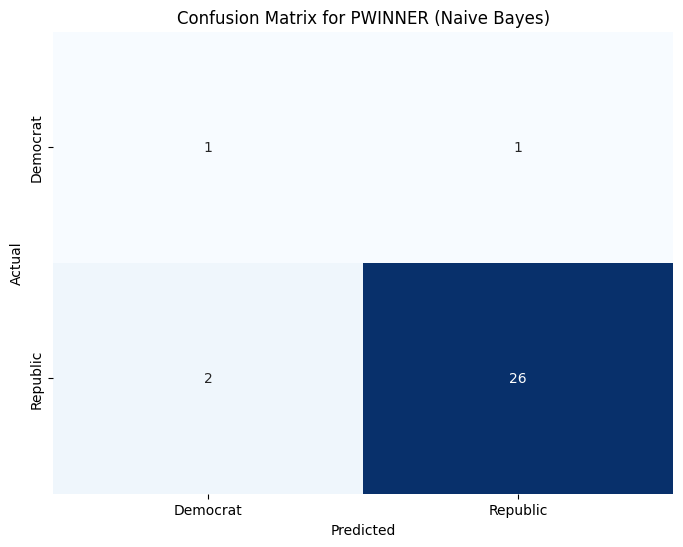

In [108]:
# Naive Bayes for PWINNER (Gaussian Naive Bayes)
nb_cwinner = GaussianNB()
nb_cwinner.fit(X_train, y_train_pwinner)

# Predict the values for PWINNER
y_pred_nb_cwinner = nb_cwinner.predict(X_test)

# Evaluate the model for PWINNER
accuracy_cwinner = accuracy_score(y_test_pwinner, y_pred_nb_cwinner)
print(f'Accuracy for PWINNER (Naive Bayes): {accuracy_cwinner:.4f}')

# Confusion matrix for PWINNER
cm_cwinner = confusion_matrix(y_test_pwinner, y_pred_nb_cwinner)

# Plot confusion matrix for PWINNER
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cwinner, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Democrat', 'Republic'], yticklabels=['Democrat', 'Republic'])
plt.title('Confusion Matrix for PWINNER (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [109]:
# Calculate the predicted percentages for each class (Democrat and Republican)
republican_predictions_nb = np.sum(y_pred_nb_cwinner == 1) / len(y_pred_nb_cwinner) * 100
democrat_predictions_nb = 100 - republican_predictions_nb  # Since only two classes (Republican and Democrat)

# Print the predicted percentages for Naive Bayes model
print(f"Average Percentage of Republican wins in test set (Predicted) - Naive Bayes: {republican_predictions_nb:.2f}%")
print(f"Average Percentage of Democrat wins in test set (Predicted) - Naive Bayes: {democrat_predictions_nb:.2f}%")

Average Percentage of Republican wins in test set (Predicted) - Naive Bayes: 90.00%
Average Percentage of Democrat wins in test set (Predicted) - Naive Bayes: 10.00%
